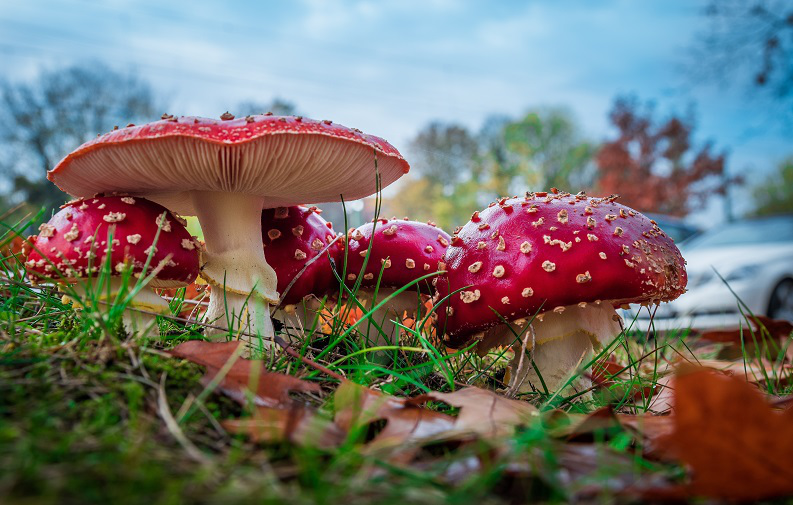

In [65]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


path="./grzybki.jpg"
img = Image.open(path)

display(img)

arr = np.array(img)

<BarContainer object of 256 artists>

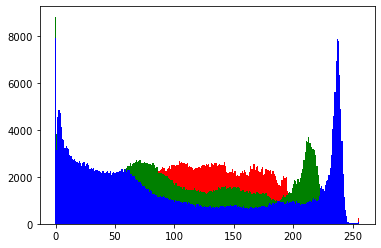

In [67]:
plt.clf()
data = np.array(img)

histR = np.zeros(256)
histG = np.zeros(256)
histB = np.zeros(256)
for i in data:
    for j in i:
        histR[j[0]] +=1
        histG[j[1]] +=1
        histB[j[2]] +=1

plt.bar(range(256), histR, color='red', width = 1)
plt.bar(range(256), histG, color='green', width = 1)
plt.bar(range(256), histB, color='blue', width = 1)


505


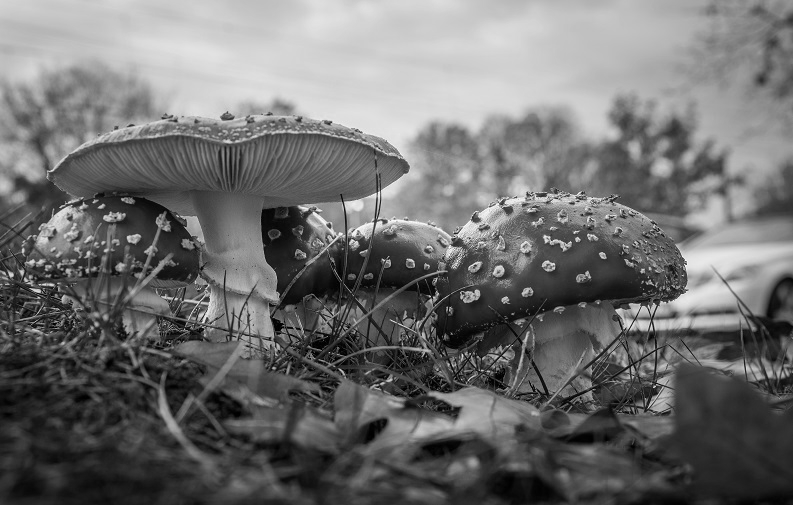

In [68]:
def RGBtoGSsavg(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = sum(RGB[i][j])/3.
    
    return RGB2

img = Image.fromarray(RGBtoGSsavg(arr), 'L')
display(img)

<BarContainer object of 256 artists>

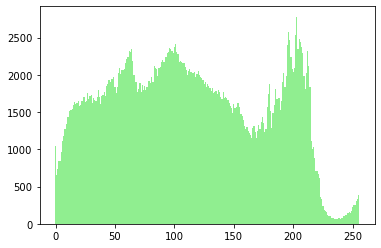

In [81]:
plt.clf()
data = np.array(img)

histB = np.zeros(256)
for i in data:
    for j in i:
        histB[j] +=1

plt.bar(range(256), histB, color='lightgreen', width = 1)


505


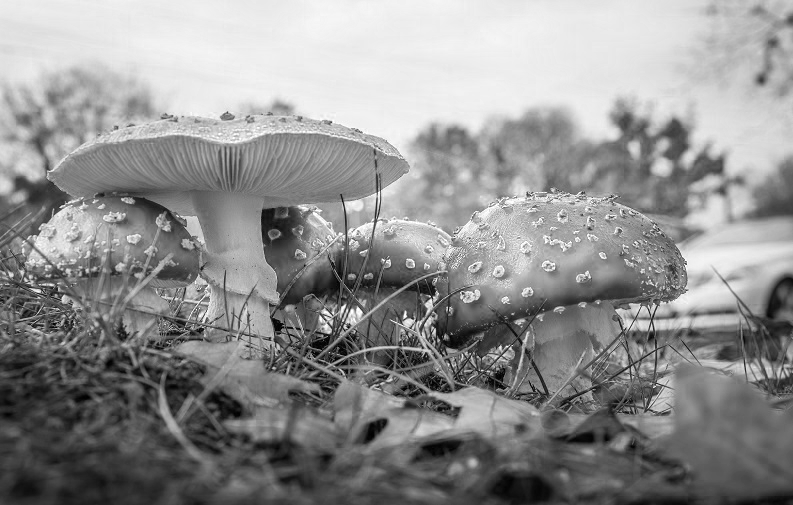

In [71]:
def RGBtoGSmax(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = max(RGB[i][j])
    
    return RGB2

img = Image.fromarray(RGBtoGSmax(arr), 'L')
display(img)

<BarContainer object of 256 artists>

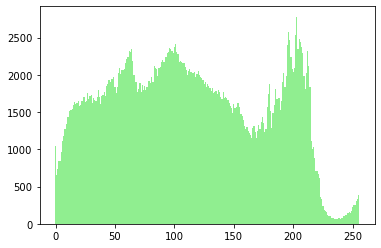

In [85]:
plt.clf()
data = np.array(img)

histB = np.zeros(256)
for i in data:
    for j in i:
        histB[j] +=1

plt.bar(range(256), histB, color='lightgreen', width = 1)


505


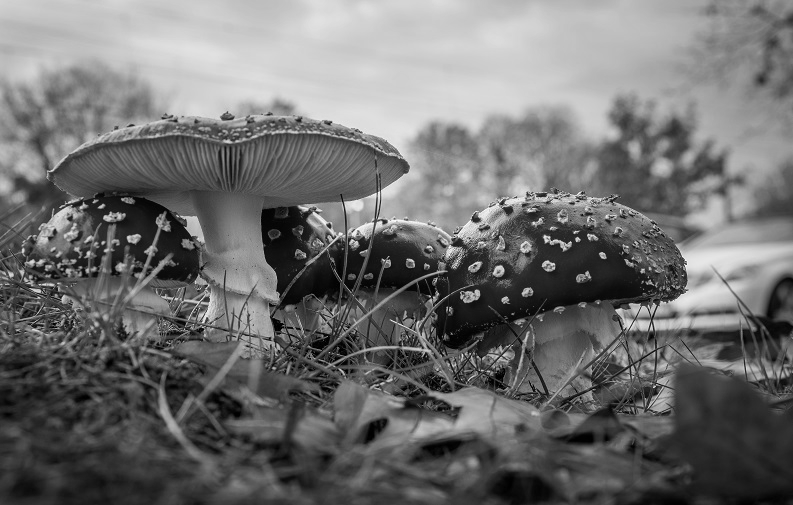

In [73]:
#percieved luminance correction

def RGBtoGSplum(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = 0.2126 * RGB[i][j][0] + 0.7152 * RGB[i][j][1] + 0.0722 * RGB[i][j][2]
    
    return RGB2

img = Image.fromarray(RGBtoGSplum(arr), 'L')
display(img)

<BarContainer object of 256 artists>

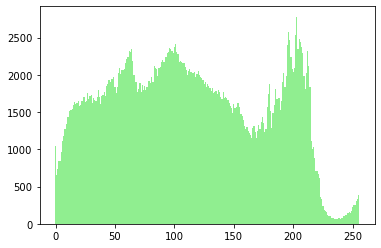

In [84]:
plt.clf()
data = np.array(img)

histB = np.zeros(256)
for i in data:
    for j in i:
        histB[j] +=1

plt.bar(range(256), histB, color='lightgreen', width = 1)


505


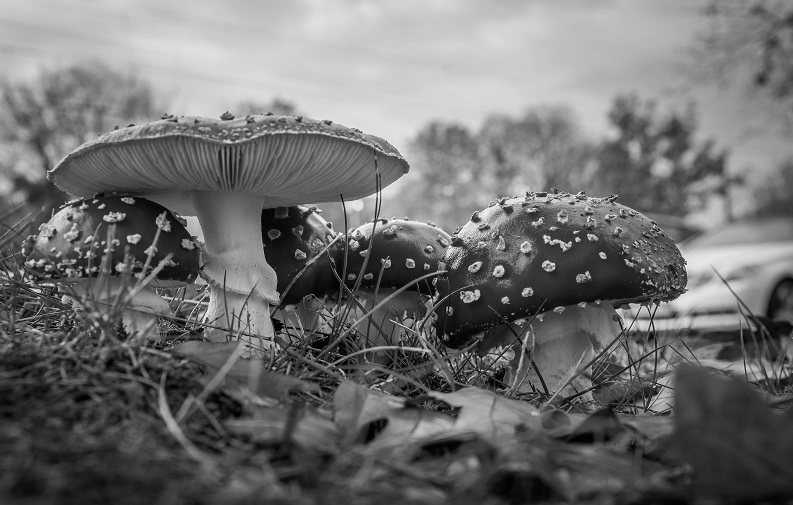

In [75]:
#linear approximation of gamma and percieved lumminance correction

def RGBtoGSlgplum(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            RGB2[i][j] = 0.299 * RGB[i][j][0] + 0.587 * RGB[i][j][1] + 0.114 * RGB[i][j][2]
    
    return RGB2

img = Image.fromarray(RGBtoGSlgplum(arr), 'L')
display(img)

<BarContainer object of 256 artists>

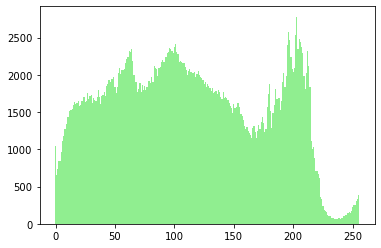

In [83]:
plt.clf()
data = np.array(img)

histB = np.zeros(256)
for i in data:
    for j in i:
        histB[j] +=1

plt.bar(range(256), histB, color='lightgreen', width = 1)


505


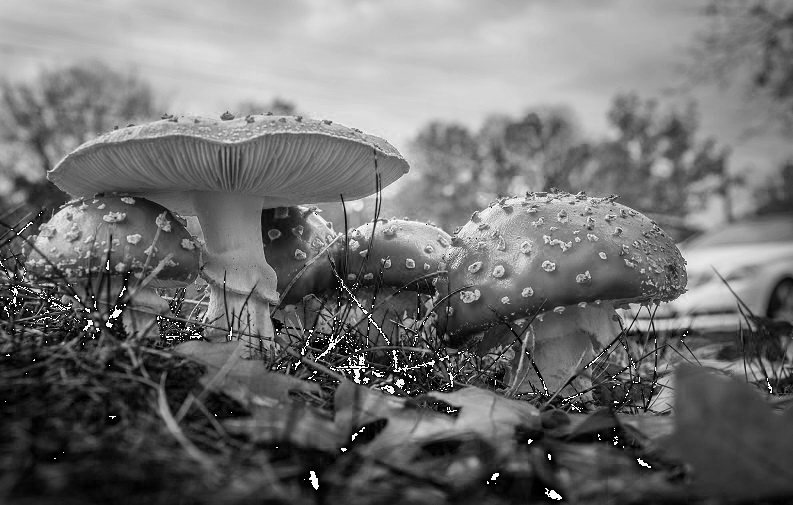

In [77]:
#podejrzana metoda z przejściem przez CIELUV/korekta do artykułu

def RGBtoGSSaravanan(RGB):
    
    h = len(RGB)
    w = len(RGB[0])
    RGB2 = np.zeros((h, w), dtype=np.uint8)
    print(len(RGB2))
    for i in range(0, h):
        for j in range(0, w):
            Y = 0.299 * RGB[i][j][0] + 0.587 * RGB[i][j][1] + 0.114 * RGB[i][j][2]
            U = (RGB[i][j][2] - Y) * 0.565
            V = (RGB[i][j][0] - Y) * 0.713
            UV = U + V
#             R1 = RGB[i][j][0] * 0.299
#             R2 = RGB[i][j][0] * 0.587            
#             R3 = RGB[i][j][0] * 0.114 
#             G1 = RGB[i][j][1] * 0.299
#             G2 = RGB[i][j][1] * 0.587
#             G3 = RGB[i][j][1] * 0.114
#             B1 = RGB[i][j][2] * 0.299
#             B2 = RGB[i][j][2] * 0.587
#             B3 = RGB[i][j][0] * 0.114;
            R4 = RGB[i,j,0]*0.299
            G4 = RGB[i,j,1]*0.587
            B4 = RGB[i,j,2]*0.114
            tmp = int((R4+G4+B4+UV))
            RGB2 [i][j] = tmp
#             RGB2 [i][j] = (R4 + G4 + B4 + UV)/4
            
    return RGB2

img = Image.fromarray(RGBtoGSSaravanan(arr), 'L')
display(img)

<BarContainer object of 256 artists>

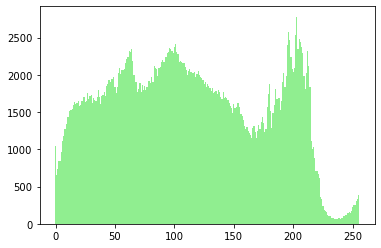

In [82]:
plt.clf()
data = np.array(img)

histB = np.zeros(256)
for i in data:
    for j in i:
        histB[j] +=1

plt.bar(range(256), histB, color='lightgreen', width = 1)
